# Project : Stock Market Analysis and Stock Prediction
* Model : RNN and LSTM (Long-Shot Term Memory)

## Life Cycle of the project :
1. Data and Library Import
2. Data observation and Profit/Loss in a day
3. Time Series Analysis
4. Deep Learning Model


## 1. Data and Library Import

* **Data Source : Yahoo Finance**
* **Historical Data : TCS.NS (Tata Consultancy Services)**

In [202]:
# Basic library Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

# Ignoring the warnings :
import warnings
warnings.filterwarnings("ignore")

In [203]:
# Update the data path accordingly
data_path = "/content/TCS.NS.csv"
data = pd.read_csv(data_path)

In [204]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-08-12,38.724998,40.000000,38.724998,39.700001,27.998854,212976.0
1,2002-08-13,39.750000,40.387501,38.875000,39.162498,27.619776,153576.0
2,2002-08-14,39.250000,39.250000,35.724998,36.462502,25.715582,822776.0
3,2002-08-15,36.462502,36.462502,36.462502,36.462502,25.715582,0.0
4,2002-08-16,36.275002,38.000000,35.750000,36.375000,25.653864,811856.0


In [205]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5360,2024-02-28,4095.600098,4154.899902,4089.000000,4118.950195,4118.950195,1939225.0
5361,2024-02-29,4099.000000,4138.100098,4064.550049,4095.100098,4095.100098,3772719.0
5362,2024-03-01,4107.200195,4140.000000,4086.800049,4094.350098,4094.350098,2043265.0
5363,2024-03-04,4105.000000,4117.899902,4075.899902,4080.699951,4080.699951,1749271.0
5364,2024-03-05,4062.000000,4064.000000,3980.000000,4012.100098,4012.100098,2070859.0


In [206]:
data['Date'] = pd.to_datetime(data['Date'], format='%Y/%m/%d')

**About data :**
* **Open:** This refers to the price at which the first trade for a particular stock occurs on a trading day.
* **High:** This represents the highest price at which the stock was traded during the day.
* **Low:** This represents the lowest price at which the stock was traded during the day.
* **Close:** This is the price at which the last trade for the stock occurs on a trading day. It's often considered the most significant price point as it reflects the final market sentiment for that day.
* **Adj Close (Adjusted Closing Price):** The closing price might be adjusted due to corporate actions like stock splits or dividend payouts. The adjusted closing price reflects the price after accounting for these adjustments, allowing for a more accurate comparison of a stock's price over time.
* **Volume:** This represents the total number of shares traded for a particular stock on a given day. It indicates the trading activity for that stock. A higher volume suggests a more liquid stock with more active buying and selling.

## 2. Data observation and Profit/Loss in a day

* **Data observation : Historical Data Graph**
* **Making profit/loss column : Derivative of "open" and "Adj Close"**

In [207]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5365 entries, 0 to 5364
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5365 non-null   datetime64[ns]
 1   Open       5356 non-null   float64       
 2   High       5356 non-null   float64       
 3   Low        5356 non-null   float64       
 4   Close      5356 non-null   float64       
 5   Adj Close  5356 non-null   float64       
 6   Volume     5356 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 293.5 KB


In [208]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5356.000000,5356.000000,5356.000000,5356.000000,5356.000000,5.356000e+03
mean,1181.943596,1194.085996,1168.961634,1181.438326,1064.427165,3.195901e+06
std,1133.186204,1142.902635,1122.756208,1132.839195,1105.522679,3.136974e+06
min,32.474998,36.450001,32.474998,35.474998,25.019142,0.000000e+00
25%,238.468750,243.162502,233.871880,238.196255,172.362781,1.642416e+06
50%,743.549988,751.500000,732.500000,745.425018,594.652496,2.499652e+06
75%,1900.000000,1910.637512,1872.099976,1893.437530,1697.343994,3.949860e+06
max,4153.000000,4184.750000,4105.549805,4149.500000,4149.500000,8.806715e+07


In [209]:
data.shape

(5365, 7)

In [210]:
#plt.figure(figsize=(7,7))
# Set the time as the x-axis
#plt.plot(data['Date'],data['Open'])
# Add labels and title
#plt.xlabel("Date")
#plt.ylabel("Open and Close")
#plt.title("Time Series - 1")
# Display the plot
#plt.grid()
#plt.show()

In [211]:
# Creating the Figure instance
fig = px.line(data, x="Date", y="Open")
# printing the figure instance
fig.show()

In [212]:
# Creating the Figure instance
fig = px.line(data, x="Date", y="Close")
# printing the figure instance
fig.show()

In [213]:
fig = px.line(data, x='Date', y='High')
# Only thing I figured is - I could do this
fig.add_scatter(x=data['Date'], y=data['Low'])
# Show plot
fig.show()

In [214]:
data['Profit'] = data['Open']-data['Close']

In [215]:
#data.info()

In [216]:
data['Profit'].nlargest()

4614    137.550049
4919    135.050049
4377    134.150024
4923    125.200196
4511    117.750000
Name: Profit, dtype: float64

In [217]:
data['Profit'].nsmallest()

5310   -194.300049
4383   -167.449951
5206   -149.649902
4871   -139.949951
5344   -139.000000
Name: Profit, dtype: float64

In [218]:
data.isna().sum()

Date         0
Open         9
High         9
Low          9
Close        9
Adj Close    9
Volume       9
Profit       9
dtype: int64

In [220]:
data.dropna(inplace=True)

## 3. Time Series Analysis and Preprocessing

In [221]:
df = data.reset_index()['Close']

In [222]:
df.shape

(5356,)

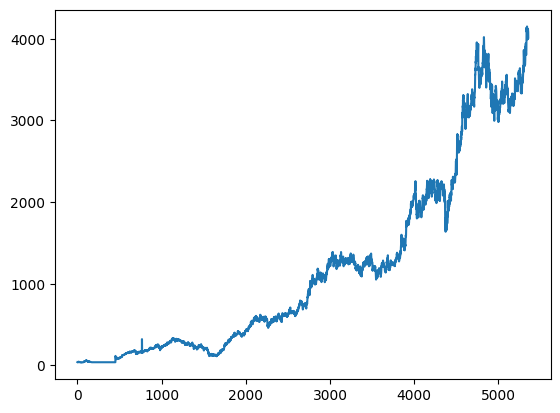

In [223]:
plt.plot(df)

**Note :** LSTM are sensitive to the scale of the data. So, we will apply MinMax Scaler

In [224]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(np.array(df).reshape(-1,1))

In [225]:
df.shape

(5356, 1)

In [226]:
df

array([[1.02697553e-03],
       [8.96324159e-04],
       [2.40033544e-04],
       ...,
       [9.86594660e-01],
       [9.83276706e-01],
       [9.66602074e-01]])

In [227]:
# Splitting Dataset into train & test split :
train_size = int(len(df)*0.7)
test_size = len(df)-train_size

train_data,test_data = df[0:train_size,:],df[train_size:len(df),:1]

In [228]:
train_size, test_size

(3749, 1607)

In [229]:
# Time Series - Time Step Preprocessing :
def create_dataset(dataset,time_step=1):
  dataX,dataY=[],[]
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return np.array(dataX),np.array(dataY)

In [230]:
# Reshape into X=t,t+1,t+2,t+3 and Y = t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [231]:
X_train.shape, y_train.shape

((3648, 100), (3648,))

In [232]:
X_test.shape, y_test.shape

((1506, 100), (1506,))

In [233]:
# We always need to re-shape X_train and X_test into 3d -> [samples, TimeSteps and features] :
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [234]:
X_train.shape, y_train.shape

((3648, 100, 1), (3648,))

In [235]:
# X_train, y_train

In [236]:
X_test.shape, y_test.shape

((1506, 100, 1), (1506,))

In [237]:
# X_test, y_test

## 4. Deep Learning Model Building :
* Stacked LSTM
* Normal RNN
* GRU

In [238]:
# Library import for Deep Learning models and Layers:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [239]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [242]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 100, 50)           10400     
                                                                 
 lstm_16 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_17 (LSTM)              (None, 50)                20200     
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [243]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
57/57 [==============================] - 1s 17ms/step - loss: 4.8911e-05 - val_loss: 0.0057
Epoch 2/100
57/57 [==============================] - 1s 16ms/step - loss: 4.9711e-05 - val_loss: 0.0066
Epoch 3/100
57/57 [==============================] - 1s 16ms/step - loss: 4.9151e-05 - val_loss: 0.0084
Epoch 4/100
57/57 [==============================] - 1s 16ms/step - loss: 4.8465e-05 - val_loss: 0.0065
Epoch 5/100
57/57 [==============================] - 1s 20ms/step - loss: 4.8577e-05 - val_loss: 0.0076
Epoch 6/100
57/57 [==============================] - 1s 22ms/step - loss: 4.6723e-05 - val_loss: 0.0058
Epoch 7/100
57/57 [==============================] - 1s 18ms/step - loss: 5.1563e-05 - val_loss: 0.0057
Epoch 8/100
57/57 [==============================] - 1s 16ms/step - loss: 5.0119e-05 - val_loss: 0.0057
Epoch 9/100
57/57 [==============================] - 1s 16ms/step - loss: 4.5615e-05 - val_loss: 0.0064
Epoch 10/100
57/57 [==============================] - 1s 16ms/st

In [244]:
# Let's do the prediction & check performance metrics ->
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

48/48 [==============================] - 1s 6ms/step


In [245]:
# Transforming back to original form ->
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [246]:
# Calculating RMSE performance metrics :
import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_train,train_predict))

700.8852621247003

In [247]:
math.sqrt(mean_squared_error(y_test,test_predict))

2698.6834209006697

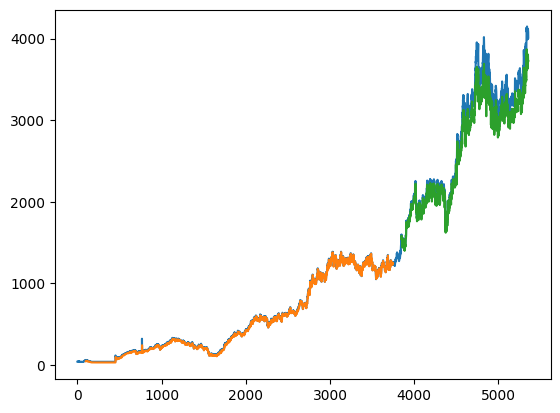

In [248]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [249]:
len(test_data)

1607

In [250]:
x_input=test_data[1507:].reshape(1,-1)
x_input.shape

(1, 100)

In [251]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [252]:
temp_input

[0.8734572352509005,
 0.868838887041844,
 0.8524680937269618,
 0.8593470137593491,
 0.8479712809970911,
 0.8438390747047774,
 0.8390262578185469,
 0.8313451917130571,
 0.840800687725135,
 0.8202854631071589,
 0.8154119380337203,
 0.8024440785836527,
 0.8058956742820496,
 0.8126044565540538,
 0.8102223492515372,
 0.8009613219166334,
 0.8081198092825785,
 0.805883508823654,
 0.8130176652728082,
 0.8106355579702916,
 0.813333669429168,
 0.8050449259277497,
 0.8016419325105502,
 0.8011801215105985,
 0.8188635337321171,
 0.8416028337982375,
 0.8427209244753151,
 0.8468896271428152,
 0.8446047244026934,
 0.8494539781117256,
 0.8441307479443462,
 0.8316976922446034,
 0.8348697206094423,
 0.8454676382153887,
 0.8391113564749308,
 0.844957165381855,
 0.845151634059029,
 0.849806478643272,
 0.8674291231251977,
 0.870054241833701,
 0.8729224910529604,
 0.8768602286680999,
 0.8839579482944523,
 0.8648647126039026,
 0.8827790303253972,
 0.929874028509854,
 0.9294364888743085,
 0.9189844376643388,
 

In [253]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.87012243]
101
1 day input [0.86883889 0.85246809 0.85934701 0.84797128 0.84383907 0.83902626
 0.83134519 0.84080069 0.82028546 0.81541194 0.80244408 0.80589567
 0.81260446 0.81022235 0.80096132 0.80811981 0.80588351 0.81301767
 0.81063556 0.81333367 0.80504493 0.80164193 0.80118012 0.81886353
 0.84160283 0.84272092 0.84688963 0.84460472 0.84945398 0.84413075
 0.83169769 0.83486972 0.84546764 0.83911136 0.84495717 0.84515163
 0.84980648 0.86742912 0.87005424 0.87292249 0.87686023 0.88395795
 0.86486471 0.88277903 0.92987403 0.92943649 0.91898444 0.91019745
 0.91200831 0.9208804  0.91396505 0.91776908 0.91502237 0.91344241
 0.91774481 0.9109631  0.88873427 0.88266966 0.89995197 0.88546498
 0.88828456 0.89391169 0.89938079 0.93517299 0.94027748 0.92994696
 0.93561053 0.9399858  0.94981801 0.92920558 0.92520708 0.91755034
 0.91528977 0.9151804  0.91892367 0.92820897 0.95546941 0.95717091
 0.99671854 0.98393299 0.99625673 0.99615953 0.9929996  1.
 0.98799232 0.98874586 0.99484685 0.98889

In [254]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [255]:
len(df)

5356

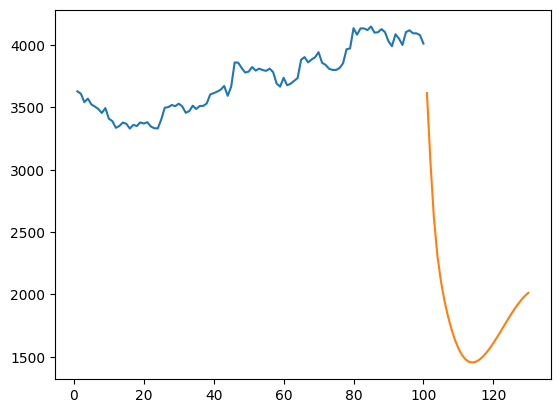

In [256]:
plt.plot(day_new,scaler.inverse_transform(df[5256:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

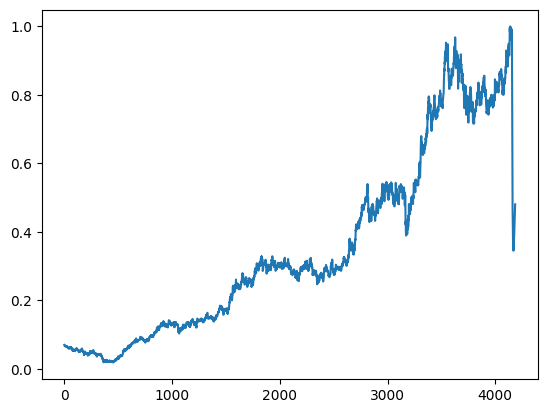

In [257]:
df1=df.tolist()
df1.extend(lst_output)
plt.plot(df1[1200:])

In [258]:
df1=scaler.inverse_transform(df1).tolist()

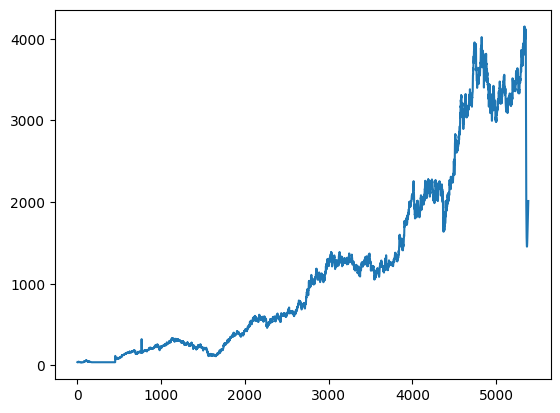

In [259]:
plt.plot(df1)